# Bag of words baseline model

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from matplotlib import pyplot as plt

In [3]:
post_type = 'post_travel'
data_path = '../data/split/train.csv'
test_data_path = '../data/split/test.csv'
narcism_type = 'adm'

In [4]:
# Read the data
data = pd.read_csv(data_path)
test_data = pd.read_csv(test_data_path)
data.head()

,post_travel,post_abortion,adm,riv,gender,gender_3_text,age,ethnic_background,ethnic_background_8_text,education,...,marital_status,twitter,none,facebook,instagram,tiktok,linkedin,pinterest,other,other_portals_7_text
0,I wish I could travel 24/7 and get paid for it,"This is a horrible time to be alive, when wome...",1.444,1.111,2.0,NaN,33,1.0,NaN,2.0,...,4.0,6.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
1,Vacations are pricey these days but so worth i...,Safe sex will always be the best option. The g...,3.889,1.111,1.0,NaN,27,8.0,Black African,2.0,...,5.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
2,I recently visited beautiful Stratford upon Av...,I am very strongly apposed against the abortio...,3.444,2.667,2.0,NaN,41,1.0,NaN,1.0,...,5.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,I have just visited Marrakesh.The scenery is l...,Abortion is an emotive subject but a total ban...,3.667,2.889,1.0,NaN,65,1.0,NaN,5.0,...,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"I travel a lot for work, and I get to see all ...",This is fucking stupid and scary. Restricting ...,1.222,1.222,1.0,NaN,30,1.0,NaN,4.0,...,5.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,reddit


In [5]:
# Create a pipeline that includes vectorization and transformation
preprocessing_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

tfidf = preprocessing_pipeline.fit_transform(data[post_type].values)
df_counts = pd.DataFrame(tfidf.toarray())
df_counts['narcissism'] = data[narcism_type]

df_counts.head()


,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,narcissism
0,0.0,0.0,0.0,0.0,0.0,0.475189,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.444
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.120431,0.0,0.0,0.0,0.0,3.889
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.444
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.184670,0.0,0.0,0.0,0.0,3.667
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.222


In [6]:
# Transform the test data
tfidf = preprocessing_pipeline.transform(test_data[post_type].values)
test_counts = pd.DataFrame(tfidf.toarray())
test_counts['narcissism'] = test_data[narcism_type]

test_counts.head()

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,narcissism
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.111
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.222
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.889


## Compare different models

In [7]:
# Load split data
X_train = df_counts.iloc[:, :-1]
y_train = np.ravel(df_counts[['narcissism']])
X_test = test_counts.iloc[:, :-1]
y_test = np.ravel(test_counts[['narcissism']])

In [8]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def predict(model, X_test):
    return model.predict(X_test)

def evaluate(y_test, y_pred):
    return root_mean_squared_error(y_test, y_pred)

In [42]:
lr_model = LinearRegression()
train_model(lr_model, X_train, y_train)
y_pred = predict(lr_model, X_test)
rmse = evaluate(y_test, y_pred)
print(f"Linear Regression MSE: {rmse}")

Linear Regression MSE: 0.7768377376883937


In [44]:
mlpr_model = MLPRegressor(max_iter=800)
train_model(mlpr_model, X_train, y_train)
y_pred = predict(mlpr_model, X_test)
rmse = evaluate(y_test, y_pred)
print(f"MLP Regressor MSE: {rmse}")

MLP Regressor MSE: 0.9559342377939227


In [9]:
svr_model = SVR()
train_model(svr_model, X_train, y_train)
y_pred = predict(svr_model, X_test)
rmse = evaluate(y_test, y_pred)
print(f"SVR MSE: {rmse}")
print(f"{y_pred=},{y_test=}")

SVR MSE: 0.6405744977662071
y_pred=array([2.86621613, 2.85818871, 2.8598325 , 2.6731725 , 2.86700215,
       2.79653551, 2.69879444, 2.82917528, 2.70810943, 2.73302444,
       2.83761605, 2.80963954, 2.79690395, 2.54940379, 2.86321399,
       2.76914833, 2.94743839, 2.8064899 , 2.74454218, 2.72827336,
       2.65833327, 2.48752245, 2.77116017, 2.96942835, 2.64019838,
       2.81382134, 2.83130546, 2.85256699, 2.70378819, 2.72743846,
       2.70246339, 2.7927127 , 2.80938382, 2.65797309, 2.7782142 ,
       2.78250123, 2.68416584, 2.71388209, 2.71928188, 2.87202821,
       2.80860677, 2.83298792, 2.83461676, 2.76483118, 2.62502205,
       2.84906632]),y_test=array([1.667, 3.   , 3.111, 2.222, 2.889, 1.889, 1.889, 1.889, 3.778,
       1.889, 3.778, 2.333, 2.889, 3.   , 4.   , 3.111, 3.889, 3.   ,
       1.556, 2.778, 1.778, 2.   , 2.   , 1.778, 2.778, 2.333, 2.   ,
       1.778, 2.667, 3.556, 3.889, 3.111, 1.333, 2.556, 2.333, 2.667,
       2.333, 1.667, 4.   , 2.111, 2.444, 4.111, 1.444,

In [46]:
rfr_model = RandomForestRegressor()
train_model(rfr_model, X_train, y_train)
y_pred = predict(rfr_model, X_test)
rmse = evaluate(y_test, y_pred)
print(f"Random Forest MSE: {rmse}")

Random Forest MSE: 0.6826325569326087


In [47]:
dtr_model = DecisionTreeRegressor()
train_model(dtr_model, X_train, y_train)
y_pred = predict(dtr_model, X_test)
rmse = evaluate(y_test, y_pred)
print(f"Decision Tree MSE: {rmse}")

Decision Tree MSE: 1.3985342391304345


So far the best effects give SVM and Random Forest, but also the simples solution has rather small MSE - LinearRegression

## Testing on some new data
Generated by chat GPT 3.5 
Prompt: *"Write me a travel post for twitter"*

In [58]:
# Choosing the best model based on the MSE
best_model = svr_model

In [60]:
# Won't work with the current data

new_data = ["Embarking on an exhilarating adventure through the enchanting streets of Kyoto, Japan. 🎌 From the serene bamboo forests of Arashiyama to the historic temples of Kinkaku-ji and Fushimi Inari Taisha, every corner unveils a tale of tradition and tranquility. #Kyoto #TravelJapan", "Lost in the colorful labyrinth of Marrakech's bustling souks, where the scent of spices fills the air and vibrant textiles dance in the breeze. 🕌✨ Exploring hidden riads, savoring tagine delights, and getting lost in the magic of Jardin Majorelle. #Marrakech #TravelGoals 🌴🌞"]
preprocessed_data = preprocessing_pipeline.transform(new_data)
post_test = pd.DataFrame(preprocessed_data.toarray())
predicted = predict(best_model, post_test)
for doc, category in zip(new_data, predicted):
     print(f'{doc} =>\nnarcism: {category}')

Embarking on an exhilarating adventure through the enchanting streets of Kyoto, Japan. 🎌 From the serene bamboo forests of Arashiyama to the historic temples of Kinkaku-ji and Fushimi Inari Taisha, every corner unveils a tale of tradition and tranquility. #Kyoto #TravelJapan =>
narcism: 2.696610216764748
Lost in the colorful labyrinth of Marrakech's bustling souks, where the scent of spices fills the air and vibrant textiles dance in the breeze. 🕌✨ Exploring hidden riads, savoring tagine delights, and getting lost in the magic of Jardin Majorelle. #Marrakech #TravelGoals 🌴🌞 =>
narcism: 2.79216584649148


Testing it on data that is not talking about travel (the abortion posts)

In [62]:
tfidf = preprocessing_pipeline.transform(data["post_abortion"].values)

test_counts_ab = pd.DataFrame(tfidf.toarray())
test_counts_ab['narcissism'] = data[narcism_type]
X_test_ab = test_counts_ab.iloc[:, :-1]
y_test_ab = np.ravel(test_counts_ab[['narcissism']])
y_pred_ab = predict(best_model, X_test_ab)
rmse = evaluate(y_test_ab, y_pred_ab)
print(f"SVR RMSE test_ab: {rmse}")

SVR MSE test_ab: 0.8148133279056374


It is interesting that the model rather correctly predicts the 'ADM' narcissism in abortion posts despite being trained on different data. MSE is still less then 1 point (on the scale 1 to 6)

# Baseline model results

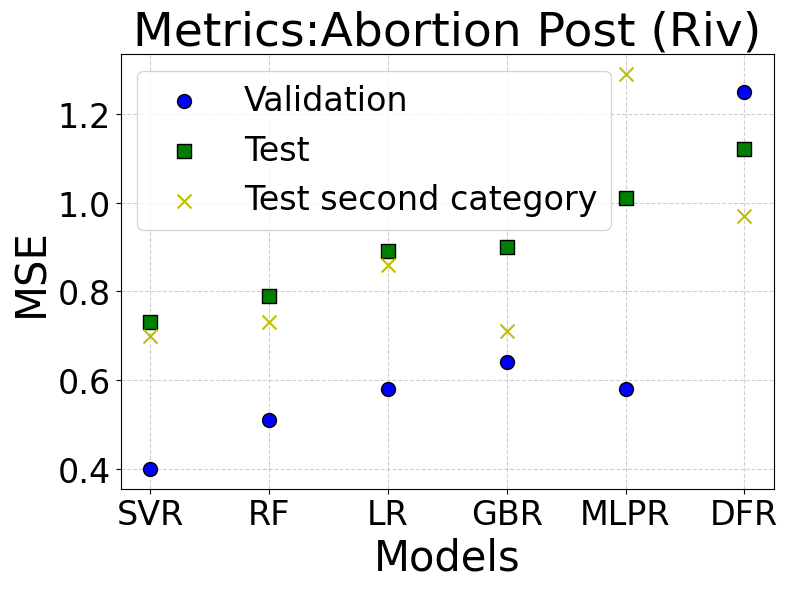

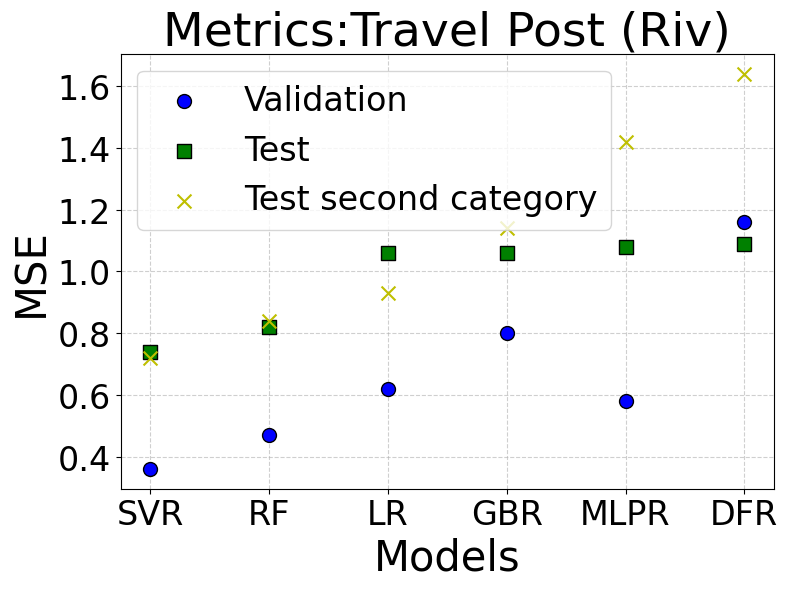

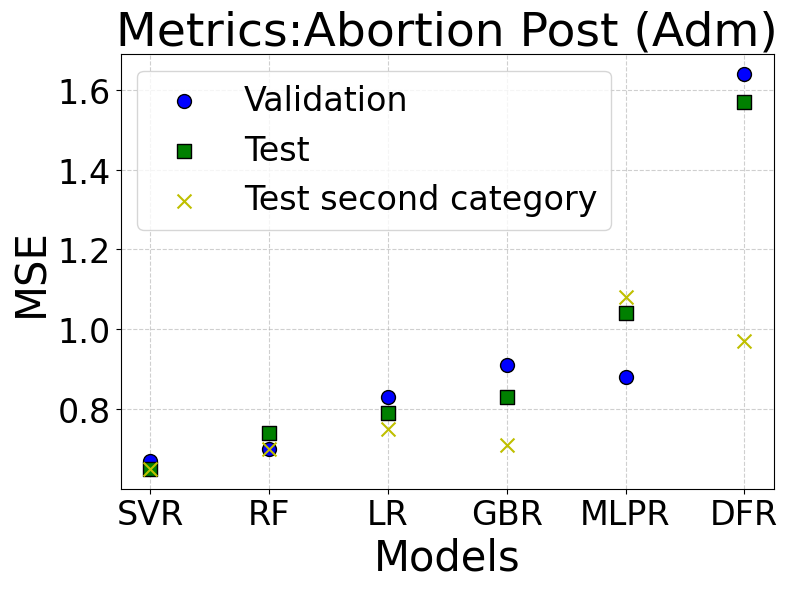

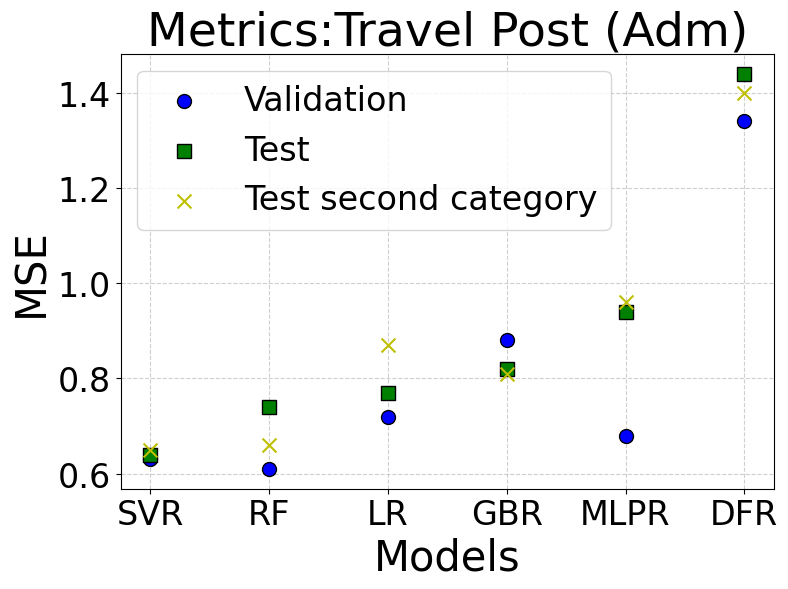

In [6]:
def plot_mse_scatter(models, val_mse, test_mse, other_model,title):
    # Combine the data into a list of tuples for sorting
    data = list(zip(models, val_mse, test_mse,other_model))
    
    # Sort the data by test MSE
    sorted_data = sorted(data, key=lambda x: x[2])
    
    # Unpack the sorted data back into separate lists
    sorted_models, sorted_val_mse, sorted_test_mse, other_model_mse = zip(*sorted_data)
    
    # Convert the sorted models list to a numeric scale for plotting
    x = range(len(sorted_models))
    
    # Create a scatter plot with smaller figure size and larger fonts
    plt.figure(figsize=(8, 6))
    
    # Plot validation MSE
    plt.scatter(x, sorted_val_mse, color='b', label='Validation', s=100, marker='o', edgecolor='k')
    
    # Plot test MSE
    plt.scatter(x, sorted_test_mse, color='g', label='Test', s=100, marker='s', edgecolor='k')
    
    # Plot test MSE
    plt.scatter(x, other_model_mse, color='y', label='Test second category', s=100, marker='x')

    # Add labels and title with larger font size
    plt.xlabel('Models', fontsize=30)
    plt.ylabel('MSE', fontsize=30)
    plt.title('Metrics:' + title, fontsize=34)
    plt.xticks(x, sorted_models, fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(fontsize=24)
    
    # Adding grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().set_axisbelow(True)  # Move grid lines to the background
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Data taken from Nepute
models = ["LR", "SVR", "RF", "GBR", "MLPR", "DFR"]
val_mse_adm_a = [0.83, 0.67, 0.70, 0.91, 0.88, 1.64]
test_mse_adm_a = [0.79, 0.65, 0.74, 0.83, 1.04, 1.57]
test_mse_adm_a_other = [0.75, 0.65, 0.70, 0.71, 1.08, 0.97]

val_mse_riv_a = [0.58, 0.40, 0.51, 0.64, 0.58, 1.25]
test_mse_riv_a = [0.89, 0.73, 0.79, 0.90, 1.01, 1.12]
test_mse_riv_a_other = [0.86, 0.70, 0.73, 0.71, 1.29, 0.97]

val_mse_riv_t = [0.62, 0.36, 0.47, 0.80, 0.58, 1.16]
test_mse_riv_t = [1.06, 0.74, 0.82, 1.06, 1.08, 1.09]
test_mse_riv_t_other = [0.93, 0.72, 0.84, 1.14, 1.42, 1.64]

val_mse_adm_t = [0.72, 0.63, 0.61, 0.88, 0.68, 1.34]
test_mse_adm_t = [0.77, 0.64, 0.74, 0.82, 0.94, 1.44]
test_mse_adm_t_other = [0.87, 0.65, 0.66, 0.81, 0.96, 1.40]

titles = ["Abortion Post (Riv)", "Travel Post (Riv)", "Abortion Post (Adm)", "Travel Post (Adm)"]


# Calling the function
plot_mse_scatter(models, val_mse_riv_a, test_mse_riv_a, test_mse_riv_a_other,titles[0])
plot_mse_scatter(models, val_mse_riv_t, test_mse_riv_t, test_mse_riv_t_other,titles[1])
plot_mse_scatter(models, val_mse_adm_a, test_mse_adm_a, test_mse_adm_a_other,titles[2])
plot_mse_scatter(models, val_mse_adm_t, test_mse_adm_t, test_mse_adm_t_other,titles[3])